<a href="https://colab.research.google.com/github/ayanhussain81/PySpark-Guide/blob/main/PySpark_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **G-10**

1.   **Ayan Hussain (SE-20081)**
2.   **Sohaib Bin Amir (SE - 20098)**
3.   **Huzaifa Aslam (SE -20080)**
4.   **Haseeb Ahmed  (SE - 20074)**



# **PySpark**

PySpark is a distributed computing framework that allows you to write Spark applications using Python. It is designed to process large datasets in a distributed and parallel manner across a cluster of computers. With PySpark, you can write code in Python that runs on a Spark cluster, allowing you to process data in a scalable and efficient way.


**Here are some key features of PySpark:**

1.   **Distributed data processing:** 
> PySpark allows you to process data in a distributed and parallel manner across a cluster of computers. This makes it possible to handle large datasets that would be too big to fit in memory on a single machine.

2.   **Machine learning algorithms:**
> PySpark includes a number of machine learning algorithms that can be used to build predictive models. These algorithms can be used to solve a wide range of problems, including classification, regression, clustering, and more.



3. **Graph processing:**
> PySpark includes a number of graph processing algorithms that can be used to analyze relationships between data points. These algorithms can be used to solve problems such as community detection, link prediction, and more.

4. **Real-time data processing:**
> PySpark supports real-time data processing, allowing you to process data as it arrives. This makes it possible to build applications that can respond to changing data in real-time.

5. **Speed:**
> It is 100x faster than traditional large-scale data processing frameworks

PySpark is widely used in data science and machine learning, and is an essential tool for anyone working with large datasets. To get started with PySpark, you'll need to install it on your computer and set up a Spark cluster. Once you've done that, you can start writing PySpark applications using Python.






















## **Installation:**
The first step would be to install and load Pyspark library that we will need to perform data loading and manipulations.



In [ ]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=806c03d9e44e8e184125d1e004963e846844a3e738099426d52e49b320dd41b2
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


## **Spark Session**
The SparkSession is an entry point to underlying PySpark functionality to programmatically create PySpark RDD, DataFrame, and Dataset.

The next step is to create a PySpark session using SparkSession.builder.appName and instantiating with getOrCreate( ).








In [ ]:
spark = SparkSession.builder.appName("Introduction to PySpark").getOrCreate()
spark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **About Dataset**
Stock prices which include open high low close, market cap and adjusted close from Jan 2019 till July 2020

[Dataset](https://www.kaggle.com/datasets/dinnymathew/usstockprices)

## **Reading Data**
The pyspark can read data from various file formats such as Comma Separated Values (CSV), JavaScript Object Notation (JSON), Parquet, e.t.c. To read different file formats we use spark.read. Here are the examples to read data from different file formats:



In [ ]:
# Reading CSV file

csv_file = '/content/stocks_price_final.csv'
df = spark.read.csv(csv_file)

# Reading JSON file

# json_file = 'data/stocks_price_final.json'
# data = spark.read.json(json_file)

# Reading parquet file

# parquet_file = 'data/stocks_price_final.parquet'
# data1 = spark.read.parquet(parquet_file)


## **Structuring Data Using Spark Schema**
Let’s read the U.S Stock Price data from January 2019 to July 2020

In [ ]:
# Before structuring schema

data = spark.read.csv(
    '/content/stocks_price_final.csv',
    sep = ',',
    header = True,
    )

data.show()


+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [ ]:
#Let’s see the schema of the data using PrintSchemamethod.

data.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



**Spark schema** is the structure of the DataFrame or Dataset, we can define it using StructType class which is a collection of StructField that defines the column name(String), column type (DataType), nullable column (Boolean), and metadata (MetaData). spark infers the schema from data however some times the inferred datatype may not be correct or we may need to define our own column names and data types, especially while working with unstructured and semi-structured data.

Let’s see how we can use this to structure our data:



In [ ]:
from pyspark.sql.types import *
import pyspark.sql.functions as f


data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    '/content/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc 
    )

data.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



The above code shows how to create structure using StructTypeand StructField. Then pass the created structure to the schema parameter while reading the data using spark.read.csv() . Let’s see the schema of the structured data:




## **Different Methods to Inspect Data**

There are various methods used to inspect the data. They are schema, dtypes, show, head, first, take, describe, columns, count, distinct, printSchema. Let’s see the explanation of their methods with an example.


1.   schema(): 
> This method returns the schema of the data(dataframe). The below example w.r.t US StockPrice data is shown.

2.   dtypes:
> It returns a list of tuples with column names and it’s data types.

3. head(n): 
> It returns n rows as a list.

4. show():
> It displays the first 20 rows by default and it also takes a number as a parameter to display the number of rows of the data.

5. first():
> It returns the first row of the data.

6. take(n): 
> It returns the first n rows of the data.

7. describe():
> It computes the summary statistics of the columns with the numeric data type.

8. columns:
> It returns a list that contains the column names of the data.

9. count():
> It returns the count of the number of rows in the data.

10. distinct():
> It returns the number of distinct rows in the data.

11. printSchema(): 
> It displays the schema of the data.

























## Columns Manipulation

Let’s see different methods that are used to add, update, delete columns of the data.



### 1. **Adding Column**:
Use withColumn the method takes two parameters column name and data to add a new column to the existing data. See the below example:


In [ ]:
data = data.withColumn('date', data.data)
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

### 2. Update column:
Use withColumnRenamed which takes to parameters existing column name and new column name to rename the existing column. See the below example:





In [ ]:
data = data.withColumnRenamed('date', 'data_changed')

data.show(5)


+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

### 3. Delete Column:
Use drop the method which takes the column name and returns the data.



In [ ]:

data = data.drop('data_changed')

data.show(5)


+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

## Dealing with Missing Values
There are various techniques to deal with missing values some of the popular ones are:



1.   Remove: 
> Remove the rows having missing values in any one of the columns.

2.  Impute with Mean/Median:
> Replace the missing values using the Mean/Median of the respective column. It’s easy, fast, and works well with small numeric datasets.
3. Impute with Most Frequent Values:
As the name suggests use the most frequent value in the column to replace the missing value of that column. This works well with categorical features and may also introduce bias into the data.
4. Impute using KNN:
K-Nearest Neighbors is a classification algorithm that uses feature similarity using different distance metrics such as Euclidean, Mahalanobis, Manhattan, Minkowski, and Hamming e.t.c. for any new data points. This is very efficient compared to the above-mentioned methods to impute missing values depending on the dataset and it is computationally expensive and sensitive to outliers.


Let’s see how we can use PySpark to deal with missing values:












In [ ]:
# Remove Rows with Missing Values

data = data.na.drop()

# Replacing Missing Values with Mean

data = data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])



# Querying Data
The PySpark and PySpark SQL provide a wide range of methods and functions to query the data at ease. Here are the few most used methods:


### 1. Select
It is used to select single or multiple columns using the names of the columns. Here is a simple example:



In [ ]:
## Selecting Single Column

data.select('sector').show(5)

## Selecting Multiple columns

data.select(['open', 'close', 'adjusted']).show(5)


+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



### 2. When
It returns 0 or 1 depending on the given condition, the below example shows how to select the opening and closing price of stocks when the adjusted price is greater than equals to 200.




In [ ]:
data.select('open', 'close', 
            f.when(data.adjusted >= 200.0, 1).otherwise(0)
           ).show(5)


+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



### 3. GourpBy
The name itself explains that it groups the data by the given column name and it can perform different operations such as sum, mean, min, max, e.t.c. The below example explains how to get the average opening, closing, and adjusted stock price concerning industries.



In [ ]:
data.select([
             'industry', 
             'open', 
             'close', 
             'adjusted'
            ]
            ).groupBy('industry')\
            .mean()\
            .show()


+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...|1.9171173469387743|1.9197193877551002|1.9197193877551002|
|       Miscellaneous|30.740331673469377|30.591632693877546|30.591632693877546|
|Biotechnology: Bi...|39.293222131295444|39.278706644784144|  39.1380956890333|
|Other Specialty S...|10.725665798469393| 10.70085798554422|10.658858871598643|
|Biotechnology: El...|12.709659864795912| 12.70280951615645| 12.70280951615645|
|Other Consumer Se...|13.580954272799353|13.566441431932338|13.566441431932338|
|Electric Utilitie...|  23.6995153112245| 23.73390310204083|22.674491265306116|
|        Water Supply|21.803724503401348|21.817474448979596|21.587019372448985|
|               Banks| 9.474257253384907| 9.474808510638294| 9.474808510638294|
|Farming/Seeds/Mil...| 39.42225321109698

## Aggregation

PySpark provides built-in standard Aggregate functions defines in DataFrame API, these come in handy when we need to make aggregate operations on columns of the data. Aggregate functions operate on a group of rows and calculate a single return value for every group. The below example shows how to display the minimum, maximum, and average; opening, closing, and adjusted stock prices from January 2019 to January 2020 concerning the sectors.



In [ ]:
from pyspark.sql.functions import col, lit, min, max

data.filter((col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31'))).groupBy("sector").agg(min(col("data")).alias("From"), max(col("data")).alias("To"))
data.show(truncate=False)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+------------------------------------------------+--------+
|_c0|symbol|data      |open     |high     |low      |close    |volume |adjusted |market.cap|sector       |industry                                        |exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+------------------------------------------------+--------+
|1  |TXG   |2019-09-12|54.0     |58.0     |51.0     |52.75    |7326300|52.75    |$9.31B    |Capital Goods|Biotechnology: Laboratory Analytical Instruments|NASDAQ  |
|2  |TXG   |2019-09-13|52.75    |54.355   |49.150002|52.27    |1025200|52.27    |$9.31B    |Capital Goods|Biotechnology: Laboratory Analytical Instruments|NASDAQ  |
|3  |TXG   |2019-09-16|52.450001|56.0     |52.009998|55.200001|269900 |55.200001|$9.31B    |Capital Goods|Biotechnology: Laboratory Analytical Instruments|NASDAQ  |
|4  |TXG  


## Data Visualization

We are going to utilize matplotlib and pandas to visualize data, the toPandas() method used to convert the data into pandas dataframe. Using the dataframe we utilize the plot() method to visualize data. The below code shows how to display a bar graph for the average opening, closing, and adjusted stock price concerning the sector.

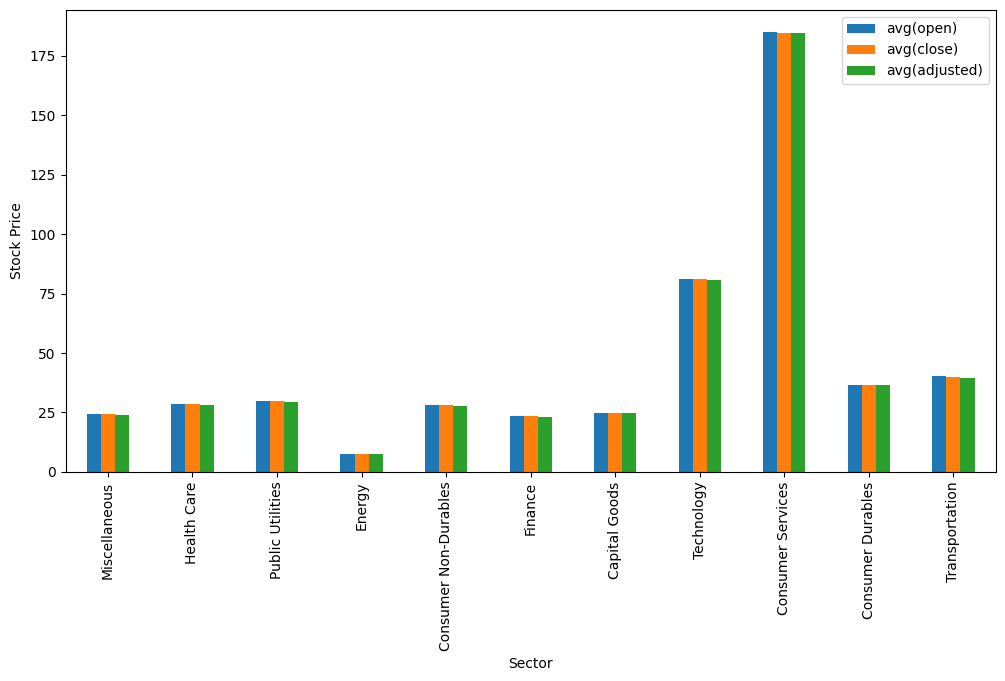

In [ ]:
import matplotlib.pyplot as plt
sec_df =  data.select(['sector', 
                       'open', 
                       'close', 
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))

ind.pop(6)

sec_df.iloc[ind ,:].plot(kind = 'bar', x='sector', y = sec_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel = 'Stock Price', xlabel = 'Sector')
plt.show()

Let’s see the time-series graph of the technology sector average opening, closing, and Adjusted stock price.



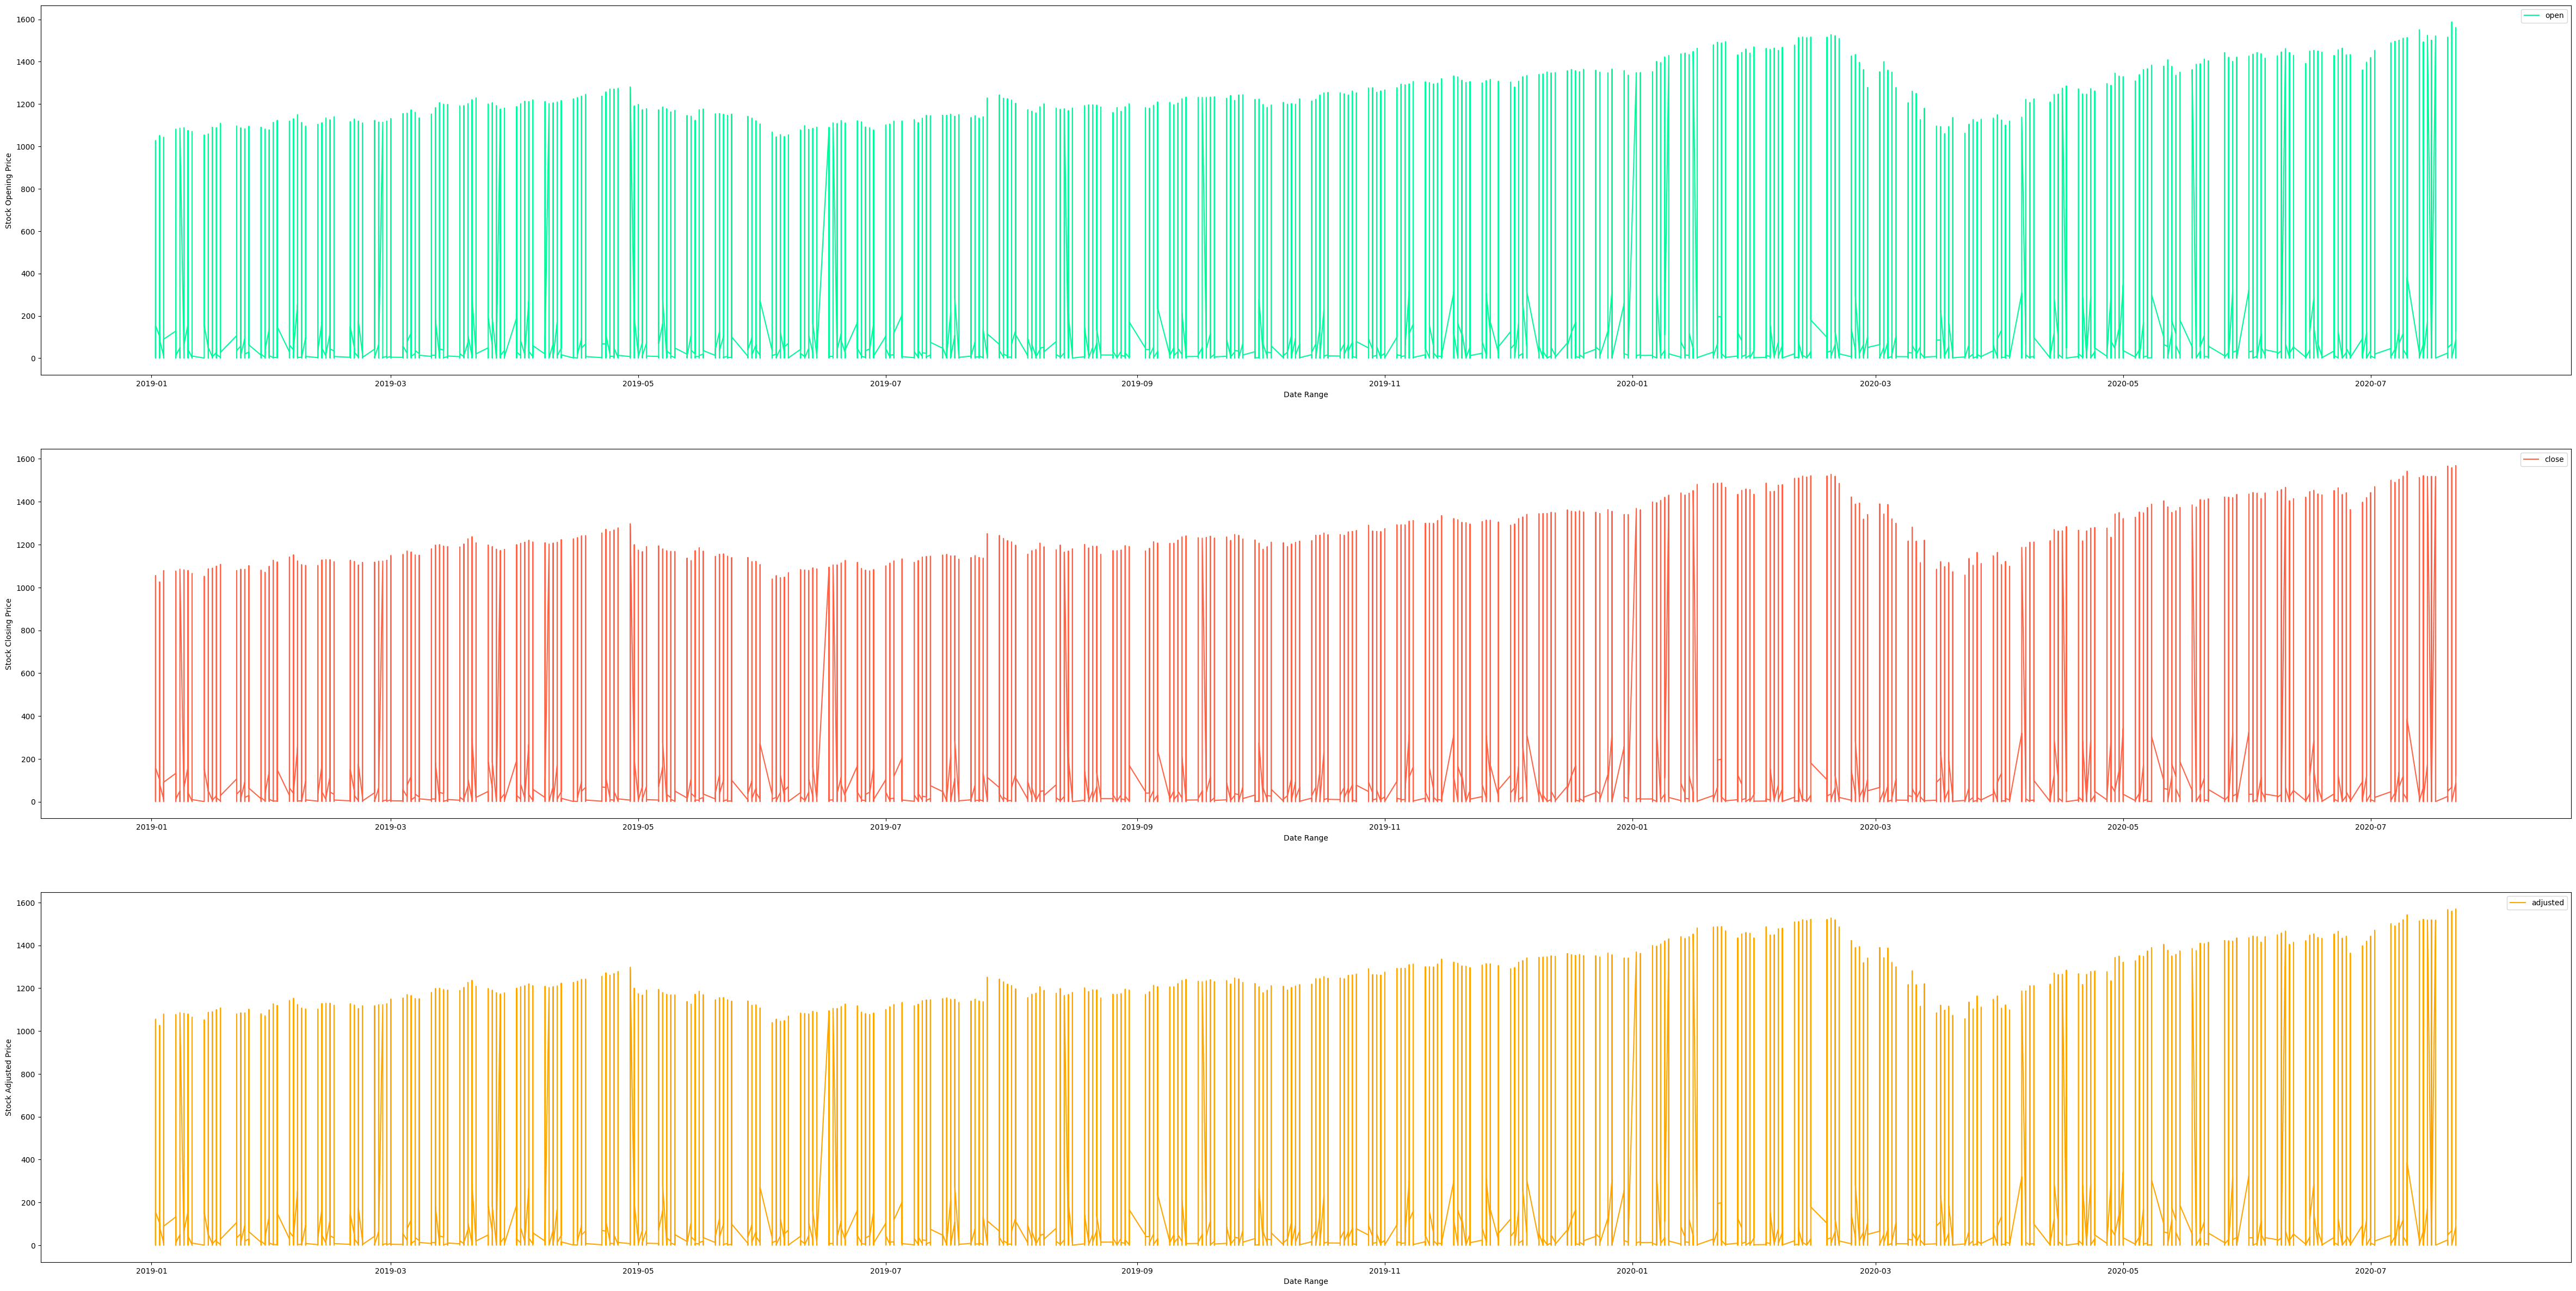

In [ ]:
from pyspark.sql.functions import col

tech = data.where(col('sector') == 'Technology')\
           .select('data', 'open', 'close', 'adjusted')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))

tech.toPandas().plot(kind = 'line', x = 'data', y='open', 
                     xlabel = 'Date Range', ylabel = 'Stock Opening Price', 
                     ax = axes[0], color = 'mediumspringgreen')

tech.toPandas().plot(kind = 'line', x = 'data', y='close',
                     xlabel = 'Date Range', ylabel = 'Stock Closing Price',
                     ax = axes[1], color = 'tomato')

tech.toPandas().plot(kind = 'line', x = 'data', y='adjusted', 
                     xlabel = 'Date Range', ylabel = 'Stock Adjusted Price', 
                     ax = axes[2], color = 'orange')

plt.show()


## Write/Save Data to File


In [ ]:
## Writing entire data to different file formats

# CSV
data.write.csv('dataset2.csv')

# JSON
data.write.save('dataset2.json', format='json')

# Parquet
data.write.save('dataset2.parquet', format='parquet')

## Writing selected data to different file formats

# CSV
data.select(['data', 'open', 'close', 'adjusted'])\
            .write.csv('dataset2.csv')

# JSON
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset2.json', format='json')

# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset2.parquet', format='parquet')


## Conclusion

PySpark is a great language for data scientists to learn because it enables scalable analysis and ML pipelines. If you’re already familiar with Python and SQL and Pandas, then PySpark is a great way to start.

This article showed how to perform a wide range of operations starting with reading files to writing insights to file using PySpark. It’s also covered the basic visualization techniques using matplotlib to visualize the insights.